# Petri Net Discovery: Sequencial & Loop & Parallel Workflow Patterns

## Step 1: Setup

In [1]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

## Step 2: Load Event Log from CSV

In [22]:
df = pd.read_csv("2d_toy_log_day11-sequential-loop-parallel-choice-more.csv", sep=';',parse_dates=["timestamp"])
df

,timestamp,location,day,report_case_id,simpler_event_type
0,09/05/2025 08:52,home,09/05/2025,1,self-report_high
1,09/05/2025 13:36,other,09/05/2025,3,physical_activity_START
2,09/05/2025 13:48,other,09/05/2025,3,physical_activity_END
3,09/05/2025 13:55,other,09/05/2025,3,physical_activity_START
4,09/05/2025 13:58,other,09/05/2025,3,physical_activity_END
5,09/05/2025 15:01,other,09/05/2025,3,self-report_low
6,10/05/2025 10:18,other,10/05/2025,7,physical_activity_START
7,10/05/2025 10:21,other,10/05/2025,7,physical_activity_END
8,10/05/2025 10:26,other,10/05/2025,7,physical_activity_START
9,10/05/2025 10:30,other,10/05/2025,7,physical_activity_END


## Step 3: Prepare the Event Log
PM4Py expects specific column names. Let's rename them and sort the log by time within each case.

In [23]:
# Rename columns to PM4Py convention
df = df.rename(columns={
    "timestamp": "time:timestamp",
    "report_case_id": "case:concept:name",
    "simpler_event_type": "concept:name"
})

# Sort by case and time
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values(by=["case:concept:name", "time:timestamp"])
#df['case:concept:name'] = df['case:concept:name'].dt.strftime('%Y-%m-%d')

# Ensure concept:name is string type
df['concept:name'] = df['concept:name'].astype(str)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   time:timestamp     43 non-null     datetime64[ns, UTC]
 1   location           43 non-null     object             
 2   day                43 non-null     datetime64[ns, UTC]
 3   case:concept:name  43 non-null     int64              
 4   concept:name       43 non-null     object             
dtypes: datetime64[ns, UTC](2), int64(1), object(2)
memory usage: 1.8+ KB


## Step 4: Convert to PM4Py Event Log

In [24]:
from pm4py.objects.conversion.log import converter as log_converter

event_log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)

## Step 5: Discover the Process Tree Using Inductive Miner

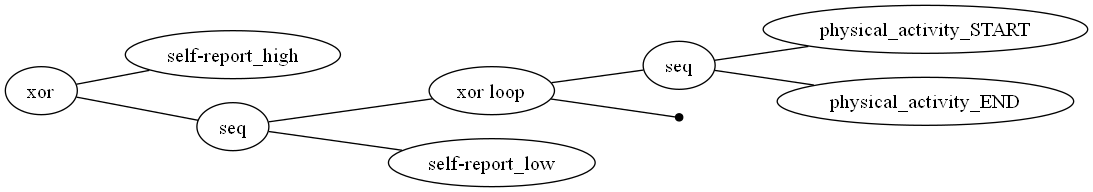

In [25]:
## Discover Process Model
# First get the process tree
process_tree = inductive_miner.apply(event_log)

# Visualize Process Tree
from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz_pt = pt_visualizer.apply(process_tree)
pt_visualizer.view(gviz_pt)



## Step 6: Converting to Petri Net

In [26]:
# Convert process tree to Petri net
from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(process_tree)



## Step 7: Visualizing the Petri Net

Simple Petri Net 

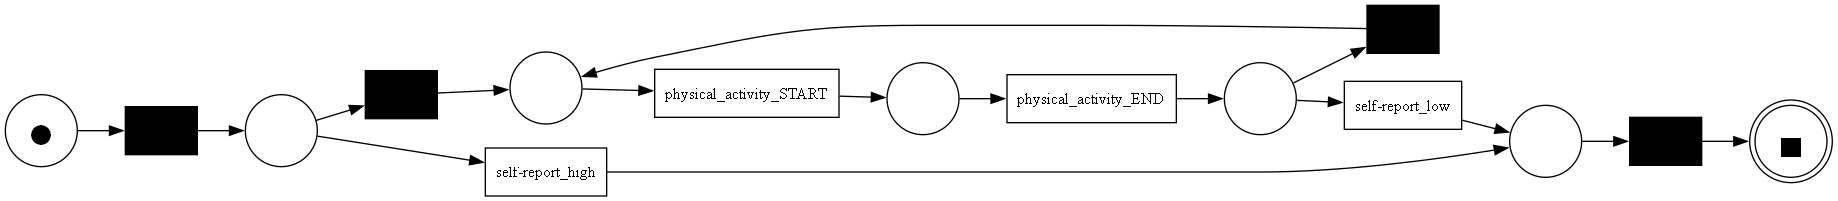

In [27]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                          log=event_log)
pn_visualizer.view(gviz)

Petri Net with frequency statistics

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

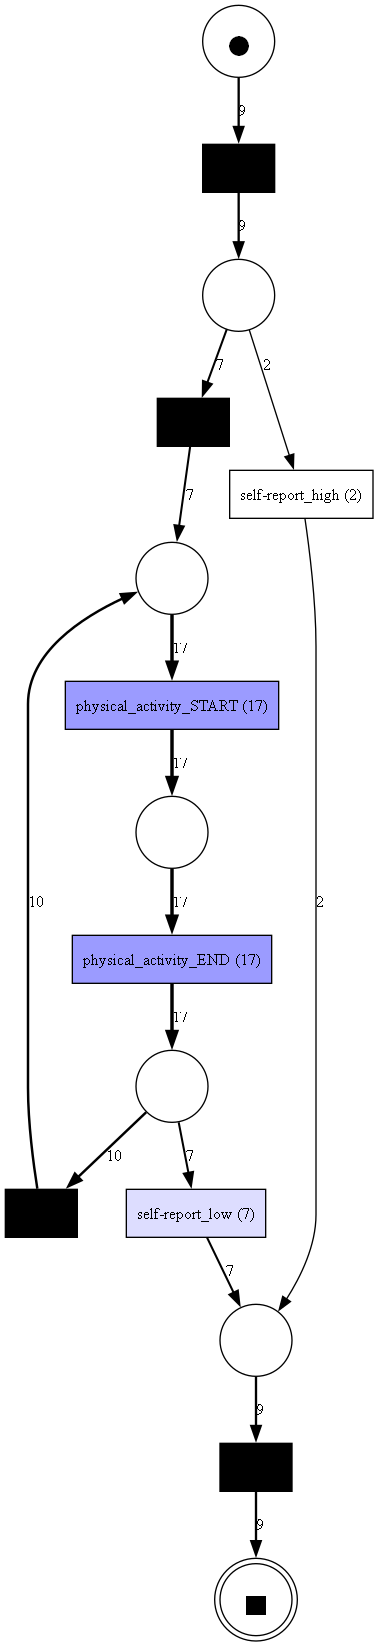

In [28]:
# Visualizing
# For frequency-based visualization
parameters = {
    pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png",
    pn_visualizer.Variants.FREQUENCY.value.Parameters.DEBUG: False,
    pn_visualizer.Variants.FREQUENCY.value.Parameters.RANKDIR: "TB"
}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                          variant=pn_visualizer.Variants.FREQUENCY,
                          parameters=parameters,
                          log=event_log)
pn_visualizer.view(gviz)

Petri net with time statistics

In [9]:
# Convert process tree to Petri net
# For performance-based visualization (showing time statistics)
# Convert timestamps if they're not in datetime format
if isinstance(event_log[0][0]['time:timestamp'], str):
    for trace in event_log:
        for event in trace:
            event['time:timestamp'] = pd.to_datetime(event['time:timestamp'])


parameters = {
    pn_visualizer.Variants.PERFORMANCE.value.Parameters.FORMAT: "png",
    pn_visualizer.Variants.PERFORMANCE.value.Parameters.DEBUG: False,
    pn_visualizer.Variants.PERFORMANCE.value.Parameters.RANKDIR: "TB",
    pn_visualizer.Variants.PERFORMANCE.value.Parameters.AGGREGATION_MEASURE: "mean",  # or "median", "min", "max"
    pn_visualizer.Variants.PERFORMANCE.value.Parameters.ACTIVITY_KEY: "concept:name",
    pn_visualizer.Variants.PERFORMANCE.value.Parameters.TIMESTAMP_KEY: "time:timestamp"
}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                          variant=pn_visualizer.Variants.PERFORMANCE,
                          parameters=parameters,
                          log=event_log)

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
pn_visualizer.save(gviz, "petri_net_with_statistics.png")

''

## Data Aware Mining

In [29]:
# Visualize the Petri net with enhanced visibility for transition names
parameters = {
    pn_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png",
    pn_visualizer.Variants.WO_DECORATION.value.Parameters.DEBUG: False,
    pn_visualizer.Variants.WO_DECORATION.value.Parameters.RANKDIR: "TB",    # Add these parameters to enhance transition name visibility
    pn_visualizer.Variants.WO_DECORATION.value.Parameters.FONT_SIZE: 12# Specifically show transition labels
}

# Create and save the visualization
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters)
pn_visualizer.save(gviz, "enhanced_petri_net_with_labels.png")

''

In [30]:
# Print all transition names in your net
for transition in net.transitions:
    print(transition.name)

2d0a5ea4-5fbb-4952-8dc8-f4ba7ffa9179
tau_1
init_loop_3
tau_2
f6796f85-5826-4a01-b089-26b15574b64f
93baabc3-b093-4ec7-a460-b15e32b867b6
2576280a-f15e-41a1-bb98-f03962437eb6
skip_5


In [31]:
# Initialize the miner (as before)
import sys
sys.path.append('..')
from src.data_aware_mining import DataAwareProcessMining
miner = DataAwareProcessMining(net, initial_marking, final_marking, event_log)
print(event_log)

[{'attributes': {'concept:name': 1}, 'events': [{'time:timestamp': Timestamp('2025-09-05 08:52:00+0000', tz='UTC'), 'location': 'home', 'day': Timestamp('2025-09-05 00:00:00+0000', tz='UTC'), 'concept:name': 'self-report_high'}]}, '....', {'attributes': {'concept:name': 22}, 'events': [{'time:timestamp': Timestamp('2025-05-13 08:45:00+0000', tz='UTC'), 'location': 'home', 'day': Timestamp('2025-05-13 00:00:00+0000', tz='UTC'), 'concept:name': 'self-report_high'}]}]


In [32]:
# First detect choice points
choice_points = miner.detect_choice_points()
miner.get_choice_point_names()
choice_points


=== Detecting Choice Points ===
All transitions in net:
  - 2d0a5ea4-5fbb-4952-8dc8-f4ba7ffa9179 (label: self-report_low)
  - tau_1 (label: None)
  - init_loop_3 (label: None)
  - tau_2 (label: None)
  - f6796f85-5826-4a01-b089-26b15574b64f (label: self-report_high)
  - 93baabc3-b093-4ec7-a460-b15e32b867b6 (label: physical_activity_START)
  - 2576280a-f15e-41a1-bb98-f03962437eb6 (label: physical_activity_END)
  - skip_5 (label: None)

All places in net:
  - p_3
    Outgoing arcs:
      -> f6796f85-5826-4a01-b089-26b15574b64f (label: self-report_high)
      -> init_loop_3 (label: None)
    Incoming arcs:
      <- tau_1 (label: None)
  - p_6
    Outgoing arcs:
      -> 93baabc3-b093-4ec7-a460-b15e32b867b6 (label: physical_activity_START)
    Incoming arcs:
      <- init_loop_3 (label: None)
      <- skip_5 (label: None)
  - p_7
    Outgoing arcs:
      -> skip_5 (label: None)
      -> 2d0a5ea4-5fbb-4952-8dc8-f4ba7ffa9179 (label: self-report_low)
    Incoming arcs:
      <- 2576280a-f15e

In [33]:
# First see what transitions and labels you have
miner.print_transition_labels()


Current transition labels in net:
Transition: 2d0a5ea4-5fbb-4952-8dc8-f4ba7ffa9179
  Label: self-report_low
Transition: tau_1
  Label: (no label)
Transition: init_loop_3
  Label: (no label)
Transition: tau_2
  Label: (no label)
Transition: f6796f85-5826-4a01-b089-26b15574b64f
  Label: self-report_high
Transition: 93baabc3-b093-4ec7-a460-b15e32b867b6
  Label: physical_activity_START
Transition: 2576280a-f15e-41a1-bb98-f03962437eb6
  Label: physical_activity_END
Transition: skip_5
  Label: (no label)


In [34]:
# Then modify labels as needed
miner.set_transition_label('init_loop_3', 'physical_activity_START')
# Check the changes
miner.print_transition_labels()

Set label 'physical_activity_START' for transition init_loop_3

Current transition labels in net:
Transition: 2d0a5ea4-5fbb-4952-8dc8-f4ba7ffa9179
  Label: self-report_low
Transition: tau_1
  Label: (no label)
Transition: init_loop_3
  Label: physical_activity_START
Transition: tau_2
  Label: (no label)
Transition: f6796f85-5826-4a01-b089-26b15574b64f
  Label: self-report_high
Transition: 93baabc3-b093-4ec7-a460-b15e32b867b6
  Label: physical_activity_START
Transition: 2576280a-f15e-41a1-bb98-f03962437eb6
  Label: physical_activity_END
Transition: skip_5
  Label: (no label)


In [35]:
# Mine a decision tree for a specific choice point
# For example, if you have a place named "p1" and want to use attributes "age" and "priority"
result = miner.mine_decision_tree(
    place_name="p_3",
    attributes=["location"],
    max_depth=2  # optional: limit tree depth
)


=== Mining Decision Tree ===
Place: p_3
Attributes: ['location']

Found 2 transitions for this choice point:
  - f6796f85-5826-4a01-b089-26b15574b64f (label: self-report_high)
  - init_loop_3 (label: physical_activity_START)

=== Finding Traces for Choice Point ===
Looking for traces at place: p_3
  Transition: f6796f85-5826-4a01-b089-26b15574b64f
    Label: self-report_high
  Transition: init_loop_3
    Label: physical_activity_START

Transitions that can be taken from this place (by label):
  - self-report_high (transition: f6796f85-5826-4a01-b089-26b15574b64f)
  - physical_activity_START (transition: init_loop_3)

Processing trace 1
Number of events: 1

  Checking event 0: self-report_high
    Found a transition from our place: f6796f85-5826-4a01-b089-26b15574b64f (label: self-report_high)
    Attribute location: home
    Single-event trace - using this transition

Processing trace 2
Number of events: 5

  Checking event 0: physical_activity_START
    Found a transition from our pl

c:\Users\20236075\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\20236075\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\20236075\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [21]:
# Get the decision rules in a readable format
rules = miner.get_decision_tree_rules("p_3")
print("Decision Rules:")
print(rules)

Decision Rules:
Decision Rules for p_3:

Attribute Encodings:

location:
  home -> 0

Transition Encodings:
  984e18ec-dbde-44e1-a07d-6e76577beebc -> 0
  init_loop_3 -> 1

Decision Tree Structure:
|--- class: 1


Feature Importances:
  location: 0.000

Class Distribution:
  984e18ec-dbde-44e1-a07d-6e76577beebc: 2 samples (22.2%)
  init_loop_3: 7 samples (77.8%)


In [19]:
# Get feature importances
importances = miner.get_feature_importances("p1")
print("\nFeature Importances:")
for attr, importance in importances.items():
    print(f"{attr}: {importance:.3f}")

# Make a prediction for a new case
prediction = miner.predict_transition(
    place_name="p1",
    attribute_values={
        "age": 25,
        "priority": "high"
    }
)
print(f"\nPredicted transition: {prediction}")

ValueError: No decision tree found for place 'p1'